### Importing the Libraries


In [2]:
import pandas as pd

### Importing the Dataset

In [3]:
data= pd.read_csv('DataSet for Heart Disease Analysis.csv')

### Taking Care of Missing Values

In [4]:
data.isnull().sum()

age         0
Gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Taking Care of Duplicate Values

In [5]:
data_dup= data.duplicated().any()

In [6]:
data_dup

np.True_

In [7]:
data = data.drop_duplicates()

In [8]:
data_dup= data.duplicated().any()

In [9]:
data_dup

np.False_

### Data Processing 

In [10]:
cate_val=[]
cont_val=[]

for column in data.columns:
    if data[column].nunique()<10:
        cate_val.append(column)
    else:
        cont_val.append(column)
        

In [11]:
cate_val

['Gender', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [12]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### Encoding Categorical Data

In [13]:
cate_val

['Gender', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [14]:
data['cp'].unique()

array([0, 1, 2, 3])

In [15]:
cate_val.remove('Gender')
cate_val.remove('target')

In [16]:
data = data.astype(int)

In [17]:
data = pd.get_dummies(data, columns=cate_val, drop_first=True)

In [18]:
data.head()

,age,Gender,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [19]:
bool_cols = data.select_dtypes(include='bool').columns
data[bool_cols] = data[bool_cols].astype(int)


In [20]:
data.head()

,age,Gender,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


### Feature Scaling

In [21]:
data.head()

,age,Gender,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
st= StandardScaler()
data[cont_val]= st.fit_transform(data[cont_val])

In [24]:
data.head()

,age,Gender,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,0.216620,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,2.085738,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.151179,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.717939,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.216620,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


### Splitting the Dataset into the Training set and Test set

In [25]:
X= data.drop('target', axis=1)

In [26]:
y = data['target']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [29]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

### Logistic Regression

In [30]:
data.head()

,age,Gender,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,0.216620,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,2.085738,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.151179,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.717939,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.216620,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
log = LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression()

In [33]:
y_pred1= log.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_test, y_pred1)

0.7868852459016393

In [36]:
import matplotlib.pyplot as plt


### SVC

In [37]:
from sklearn import svm

In [38]:
svm= svm.SVC()

In [39]:
svm.fit(x_train, y_train)

SVC()

In [40]:
y_pred2 = svm.predict(x_test)

In [41]:
accuracy_score(y_test, y_pred2)

0.8032786885245902

### KNeighbors Classifier Non-Linear ML Algorithms

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn= KNeighborsClassifier()

In [44]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [45]:
y_pred3 = knn.predict(x_test)

In [46]:
accuracy_score(y_test, y_pred3)

0.7377049180327869

In [47]:
score = []

for k in range (1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred= knn.predict(x_test)
    score.append(accuracy_score(y_test, y_pred))

In [48]:
score

[0.7377049180327869,
 0.7868852459016393,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7868852459016393,
 0.7377049180327869,
 0.7868852459016393,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7540983606557377,
 0.7540983606557377,
 0.7704918032786885,
 0.7377049180327869,
 0.8032786885245902,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7213114754098361,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7049180327868853,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7213114754098361]

In [49]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
y_pred= knn.predict(x_test)
accuracy_score(y_test, y_pred)

0.7868852459016393

### Non-Linear ML Algorithms

In [50]:
data = pd.read_csv('Dataset for Heart Disease Analysis.csv')

In [51]:
data.head()

,age,Gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [52]:
data= data.drop_duplicates()
data.shape

(302, 14)

In [53]:
X = data.drop('target', axis=1)
y = data['target']

In [54]:
x_train,x_test,y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42)

### Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dt= DecisionTreeClassifier()

In [57]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [58]:
y_pred4= dt.predict(x_test)

In [59]:
accuracy_score(y_test, y_pred4)

0.7540983606557377

### Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf = RandomForestClassifier()

In [62]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [63]:
y_pred5= rf.predict(x_test)


In [64]:
accuracy_score(y_test, y_pred5)

0.8360655737704918

### Gradient Boosting Classifier

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

In [66]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [67]:
y_pred6= gbc.predict(x_test)
accuracy_score(y_test, y_pred6)

0.8032786885245902

In [68]:
final_data= pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                                    'ACC':[accuracy_score(y_test, y_pred1),
                                    accuracy_score(y_test, y_pred2),
                                    accuracy_score(y_test, y_pred3),
                                    accuracy_score(y_test, y_pred4),
                                    accuracy_score(y_test, y_pred5),
                                    accuracy_score(y_test, y_pred6)] })

In [69]:
final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.754098
4,RF,0.836066
5,GB,0.803279


In [70]:
import seaborn as sns

C:\Users\Mohit\AppData\Local\Temp\ipykernel_364\1113606197.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Models', y='ACC', data=final_data, palette='viridis')


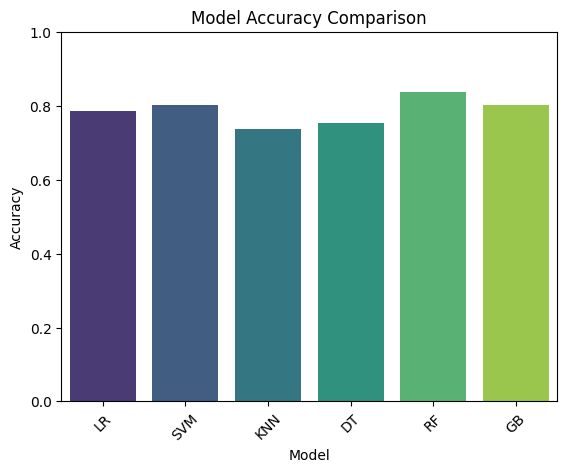

In [71]:
sns.barplot(x='Models', y='ACC', data=final_data, palette='viridis')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45) 
plt.ylim(0, 1)  
plt.show()

In [72]:
X = data.drop('target', axis=1)
y = data['target']

In [73]:
X.shape

(302, 13)

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rf= RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

### Prediction on New Data

In [76]:
import pandas as pd

In [77]:
new_data = pd.DataFrame ({

'age':52,

'Gender':1,

'cp':0,

'trestbps':125,

'chol':212,

'fbs':0,

'restecg':1,

'thalach':168,

'exang':0,

'oldpeak':1.0,

'slope':2,

'ca':2,

'thal':3,

},index=[0])

In [78]:
new_data

,age,Gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [79]:
p= rf.predict(new_data)
if p[0]==0:
    print("No-Disease")
else:
    print("Disease")

No-Disease


### Save Model Using Joblib

In [80]:
import joblib

In [81]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [82]:
model= joblib.load('model_joblib_heart')

In [83]:
p= rf.predict(new_data)
if p[0]==0:
    print("No-Disease")
else:
    print("Disease")

No-Disease


### Creating GUI

In [84]:
import joblib
from tkinter import *

# Function to collect inputs and predict
def show_entry_fields():
    try:
        pl = int(el.get())
        p2 = int(e2.get())
        p3 = int(e3.get())
        p4 = int(e4.get())
        p5 = int(e5.get())
        p6 = int(e6.get())
        p7 = int(e7.get())
        p8 = int(e8.get())
        p9 = int(e9.get())
        p10 = float(e10.get())
        p11 = int(e11.get())
        p12 = int(e12.get())
        p13 = int(e13.get())

        model = joblib.load('model_joblib_heart')  # Load trained model
        result = model.predict([[pl, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13]])

        # Clear previous result
        for widget in master.grid_slaves(row=31):
            widget.destroy()

        if result[0] == 0:
            Label(master, text="✅ No Heart Disease Detected", fg="green").grid(row=31, columnspan=2)
        else:
            Label(master, text="⚠️ Possibility of Heart Disease", fg="red").grid(row=31, columnspan=2)
    except Exception as e:
        Label(master, text=f"Error: {e}", fg="red").grid(row=31, columnspan=2)

# Initialize GUI
master = Tk()
master.title("Heart Disease Prediction System")

Label(master, text="Heart Disease Prediction System", bg="black", fg="white", font=('Arial', 14, 'bold')) \
    .grid(row=0, columnspan=2, pady=10)

# Labels
Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)

# Entry widgets
el = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

# Place entries in grid
el.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)

# Submit Button
Button(master, text='Predict', command=show_entry_fields, bg="blue", fg="white").grid(row=30, column=0, pady=10)

# Optional: Clear button
def clear_fields():
    for e in [el, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11, e12, e13]:
        e.delete(0, END)
    for widget in master.grid_slaves(row=31):
        widget.destroy()

Button(master, text='Clear', command=clear_fields, bg="gray", fg="white").grid(row=30, column=1, pady=10)

# Run GUI loop
master.mainloop()
